<a href="https://colab.research.google.com/github/janchorowski/ml_uwr/blob/fall2019/assignment1/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab Assignment 1


## Important notes

**Submission deadline:**
* **Regular problems: last lab session before or on Monday, 21.10.19**
* **Bonus problems: deadline for Lab Assignment 2**

**Points: 11 + 5 bonus points**

Please note: some of the assignments are tedious or boring if you are already a NumPy ninja. The bonus problems were designed to give you a more satisfying alternative.

The assignment is in the form of a Jupyter notebook. We will be using [Google Colab](https://colab.research.google.com) to solve it. Below you will find a "Setup" section. Follow instructions from this paragraph to download the notebook and open it using [Google Colab](https://colab.research.google.com). 

Your goal is to solve problems posted below. Whenever possible, add your solutions to the notebook.

Please email us about any problems with it - we will try to correct them quickly. Also, please do not hesitate to use GitHubâ€™s pull requests to send us corrections!

## Setup

### 1. Open the notebook using Google Colab

1. From Github: Click on "View in Colaboratory", then save to your Google Drive.
2. Alternatively upload manually to Drive:
  1. Download the notebook or clone https://github.com/janchorowski/ml_uwr.
  2. Go to  [Google Colab](https://colab.research.google.com).
  3. Go to "UPLOAD" tab and select a local copy of the notebook that you downloaded in point 1.
  
Colab Tips:
1. Set tab width to 4 spaces under `Tools` â†’ `Preferences`.
  
### 2. Open the notebook offline using Jupyter/IPython

This notebook can be opened using Jupyter notebook. Simply install a scientific Python distribution on your computer (e.g. [Anaconda](https://www.anaconda.com/) or [WinPython](http://winpython.github.io/)), clone the repository https://github.com/janchorowski/nn_assignments and run `jupyter notebook`.

###   3. Install required dependencies, download data and import packages

Run cells below. To run a cell either click it and click a run button or press "shift + enter"


In [2]:
# Please note that this code needs only to be run in a fresh runtime.
# However, it can be rerun afterwards too.
!pip install --user -q gdown httpimport
![ -e mnist.npz ] || gdown 'https://drive.google.com/uc?id=1QPaC3IKB_5tX6yIZgRgkpcqFrfVqPTXU' -O mnist.npz

Downloading...
From: https://drive.google.com/uc?id=1QPaC3IKB_5tX6yIZgRgkpcqFrfVqPTXU
To: /home/asgavar/studia/semestr_5_zima_2019_20/ml/mnist.npz
55.4MB [00:03, 15.1MB/s]


In [1]:
# Standard IPython notebook imports
%matplotlib inline

import os

import httpimport
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook
import scipy.stats as sstats

import seaborn as sns
from sklearn import datasets

# In this way we can import functions straight from github
with httpimport.github_repo('janchorowski', 'nn_assignments', 
                            module='common', branch='nn18'):
     from common.plotting import plot_mat

sns.set_style('whitegrid')

### 4. Follow the notebook and solve problems posted below

## Problems

### Problem 0 [0p]

 
1. To learn more about Jupyter,  read [Jupyter tutorial from Data Analysis in Biological Sciences course at Caltech](http://bebi103.caltech.edu/2015/tutorials/t0b_intro_to_jupyter_notebooks.html) (which itself can be downloaded as a Jupyter notebook). Feel free to skip the tutorial if you have some prior experience with Jupyter notebook.
2. To learn more about basic Google Colab features, go to [Google Colab](https://colab.research.google.com) and select "Overview of Colaboratory Features" in "EXAMPLES" tab. To learn more about / set up useful keyboard shortcuts (e.g. to add a new cell without clicking ""+ code"), go to "Tools --> Keyboard shortcuts"

### Problem 1: NumPy [2p]

First, get familiar with Python at https://docs.python.org/3/tutorial/. Then, get
to know the capabilities of NumPy, the prime numerical library of Python http://www.numpy.org/, for instance with the tutorial at http://wiki.scipy.org/Tentative_NumPy_Tutorial. Finally, look into Pandas at https://pandas.pydata.org/pandas-docs/stable/getting_started/tutorials.html.

You might also need:
  1. another intro to NumPy,
http://people.duke.edu/~ccc14/pcfb/numerics.html
  2. a better interactive shell for Python
http://ipython.org/
  3. a plotting library for Python
http://matplotlib.org/
  4. nice statistical plots for matplotlib https://seaborn.pydata.org/.


**a) Declare variables:**
1. $a=10$,
2. $b=2.5\times 10^{23}$,
3. $c=2+3i$, where $i$ is an imaginary unit,
4. $d=e^{i2\pi/3}$, where $i$ is an imaginary unit, $e$ is the Euler's number (use `exp`, `pi`).

In [22]:
a = 10
b = 2.5 * 10**23
c = 2 + 3j
d = np.exp(complex(0, 2 * np.pi / 3))

**b) Declare vectors:**
1. $aVec=\begin{bmatrix} 3.14 & 15 & 9 & 26 \end{bmatrix}$,
2. $bVec=\begin{bmatrix} 5 & 4.8 & \cdots & -4.8 & -5 \end{bmatrix}$ (vector of numbers from $5$ to $-5$ decreasing by $0.2$),
3. $cVec=\begin{bmatrix} 10^0 & 10^{0.01} & \cdots & 10^{0.99} & 10^1 \end{bmatrix}$ (logarithmically spaced numbers from 1 to 10, use `logspace` and make sure, that the result has correct length!),
4. $dVec=Hello$ ($eVec$ is a string of characters, thus a vector).

In [46]:
aVec = np.array([3.14, 15, 9, 26])
bVec = np.arange(5, -5-0.2, -0.2)
cVec = (np.zeros(101) + 10) ** np.arange(0, 1.01, 0.01)
dVec = np.array(['H', 'e', 'l', 'l', 'o'])
cVec

array([ 1.        ,  1.02329299,  1.04712855,  1.07151931,  1.0964782 ,
        1.12201845,  1.14815362,  1.17489755,  1.20226443,  1.23026877,
        1.25892541,  1.28824955,  1.31825674,  1.34896288,  1.38038426,
        1.41253754,  1.44543977,  1.47910839,  1.51356125,  1.54881662,
        1.58489319,  1.6218101 ,  1.65958691,  1.69824365,  1.73780083,
        1.77827941,  1.81970086,  1.86208714,  1.90546072,  1.9498446 ,
        1.99526231,  2.04173794,  2.08929613,  2.13796209,  2.18776162,
        2.23872114,  2.29086765,  2.34422882,  2.39883292,  2.45470892,
        2.51188643,  2.57039578,  2.63026799,  2.6915348 ,  2.7542287 ,
        2.81838293,  2.8840315 ,  2.95120923,  3.01995172,  3.09029543,
        3.16227766,  3.23593657,  3.31131121,  3.38844156,  3.4673685 ,
        3.54813389,  3.63078055,  3.71535229,  3.80189396,  3.89045145,
        3.98107171,  4.07380278,  4.16869383,  4.26579519,  4.36515832,
        4.46683592,  4.5708819 ,  4.67735141,  4.78630092,  4.89

**c) Declare matrices:**
1. $aMat=\begin{bmatrix}
                    2      & \cdots & 2 \\
                    \vdots & \ddots & \vdots \\
                    2      & \cdots & 2
                \end{bmatrix}$,
<br/>
matrix $9\times 9$ filled with 2s (use `ones` or `zeros`),
2. $bMat=\begin{bmatrix}
                    1      & 0      & \cdots &        & 0      \\
                    0      & \ddots & 0      &        & 0      \\
                    \vdots & 0      & 5      & 0      & \vdots \\
                           &        & 0      & \ddots & 0      \\
                    0      &        & \cdots & 0      & 1
                \end{bmatrix}$,
<br/>
matrix $9\times 9$ filled with zeros, with $\begin{bmatrix} 1 & 2 & 3 & 4 & 5 & 4 & 3 & 2 & 1 \end{bmatrix}$ on its diagonal (use `zeros`, `diag`),
3. $cMat=\begin{bmatrix}
                    1      & 11     & \cdots & 91     \\
                    2      & 12     & \cdots & 92     \\
                    \vdots & \vdots & \ddots & \vdots \\
                    10     & 20     & \cdots & 100
                \end{bmatrix}$,
<br/>
matrix $10\times 10$, columns of which form the vector $1:100$ (use `reshape`),
4. $dMat=\begin{bmatrix}
                    NaN & NaN & NaN & NaN \\
                    NaN & NaN & NaN & NaN \\
                    NaN & NaN & NaN & NaN
                \end{bmatrix}$,
<br/>
matrix $3\times 4$ filled with `NaN`s (use... `NaN`),
5. $eMat=\begin{bmatrix}
                    13  & -1  & 5  \\
                    -22 & 10  & -87
                \end{bmatrix}$,
6. $fMat$ of shape $3\times 3$ filled with random natural numbers from $[-3,3]$ (use `rand` and `floor` or `ceil`).

In [53]:
aMat = np.zeros(9*9).reshape(9, 9) + 2
one_to_five = [_ for _ in range(1, 5+1)]
bMat = np.diag(one_to_five + list(reversed(one_to_five[:-1])))
cMat = np.arange(1, 100+1).reshape(10, 10).transpose()
dMat = np.array([np.NaN for _ in range(3*4)]).reshape(3, 4)
eMat = np.array([[13, -1, 5], [-22, 10, -87]])
fMat = np.random.randint(-3, 3, (3, 3))
fMat

array([[ 2,  1,  0],
       [-2, -2,  0],
       [-3, -1,  1]])

**d) Declare a multiplication table**
as a $10\times 10$ matrix `mulMat`. Use matrix/vector multiplication.

In [61]:
vec = np.array([_ for _ in range(1, 10+1)])
mulMat = vec * np.array([[num for _ in range(10)] for num in range(1, 10+1)])
mulMat

array([[  1,   2,   3,   4,   5,   6,   7,   8,   9,  10],
       [  2,   4,   6,   8,  10,  12,  14,  16,  18,  20],
       [  3,   6,   9,  12,  15,  18,  21,  24,  27,  30],
       [  4,   8,  12,  16,  20,  24,  28,  32,  36,  40],
       [  5,  10,  15,  20,  25,  30,  35,  40,  45,  50],
       [  6,  12,  18,  24,  30,  36,  42,  48,  54,  60],
       [  7,  14,  21,  28,  35,  42,  49,  56,  63,  70],
       [  8,  16,  24,  32,  40,  48,  56,  64,  72,  80],
       [  9,  18,  27,  36,  45,  54,  63,  72,  81,  90],
       [ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100]])

**e) Compute element-wise using values from b).**

For instance, the first element of $xVec[0]$ should be equal to

\begin{equation}
1/(\sqrt{2\pi2.5^2}) e^{-cVec[0]^2 / (2\cdot\pi 2.5^2)}.
\end{equation}

1. $xVec=1/(\sqrt{2\pi2.5^2}) e^{-cVec^2 / (2\cdot\pi 2.5^2)}$
2. $yVec=\log_{10}(1/cVec)$, using `log10`

In [47]:
xVec = np.array([1/np.sqrt(np.pi * 2.5**2) * (np.e ** ((-1*cVec[_]**2)/2*np.pi*(2.5**2))) for _ in range(len(cVec))])
yVec = np.array([np.log10(1/elem) for elem in cVec])
print(xVec)
print(yVec)

[1.22972768e-005 7.74226594e-006 4.76932776e-006 2.87163933e-006
 1.68818063e-006 9.67909735e-007 5.40586627e-007 2.93747142e-007
 1.55095088e-007 7.94602863e-008 3.94469855e-008 1.89471552e-008
 8.79154463e-009 3.93432275e-009 1.69518742e-009 7.01993027e-010
 2.78870814e-010 1.06066465e-010 3.85449408e-011 1.33548328e-011
 4.40164382e-012 1.37681081e-012 4.07704911e-013 1.14001049e-013
 3.00185053e-014 7.42262219e-015 1.71840904e-015 3.71320402e-016
 7.46470739e-017 1.39136350e-017 2.39598861e-018 3.79773590e-019
 5.51904351e-020 7.32360870e-021 8.83584673e-022 9.64905384e-023
 9.49280962e-024 8.37224878e-025 6.58551804e-026 4.59511051e-027
 2.82818309e-028 1.52635790e-029 7.17882317e-031 2.92335881e-032
 1.02375078e-033 3.06127193e-035 7.75839506e-037 1.65355475e-038
 2.93965805e-040 4.32209544e-042 5.20863587e-044 5.09700847e-046
 4.01057093e-048 2.51150148e-050 1.23829360e-052 4.75316711e-055
 1.40374260e-057 3.15043844e-060 5.30413937e-063 6.60900012e-066
 6.00859188e-069 3.927124

**f) Compute with matrix/vector operations.**

**NOTE:** Every multiplication (and power) in this subtask is a [matrix multiplication](https://en.wikipedia.org/wiki/Matrix_multiplication).
1. $xMat=[0,  1, ..., 6][0, 10, 20, ..., 60]^T$,
2. $yMat=[0, 10, 20, ..., 60]^T[0,  1, ..., 6]$
<br/>
(remember, that matrix multiplication is not commutative).

In [71]:
xMat = np.arange(6+1) @ np.arange(0, 60+1, 10).transpose()
yMat = np.arange(0, 60+1, 10) @ np.arange(6+1)

**g) Declare `ismagic(A)` function** 
which checks if matrix $A$ is a [magic square](https://en.wikipedia.org/wiki/Magic_square) and returns a boolean.

In [79]:
import collections

def ismagic(A):
    # step 1. - are numbers unique?
    occurences = collections.Counter(A.flat)
    all_unique = all([occ == 1 for occ in occurences.values()])
    if not all_unique:
        return False
    # step 2. - is it a square matrix?
    rows, cols = A.shape
    if rows != cols:
        return False
    # step 3. - do rows and columns sum up to the same number?
    first_row_sum = sum(A[0])
    for idx in range(rows):
        are_both_ok = first_row_sum == sum(A[idx]) == sum(A.transpose()[idx])
        if not are_both_ok:
            return False
    return True
    
assert not ismagic(np.array([[1,1], [2,2]]))
assert ismagic(np.array([[2,7,6],[9,5,1],[4,3,8]]))

### Problem 2: Pandas and Seaborn [2p]

1. Load the IRIS Data into a `DataFrame`

In [2]:
iris_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
# Use read_csv to load the data. Make sure you get 150 examples!
iris_df = pd.read_csv(iris_url, header=None)

# Set the column names to
# 'sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target'
iris_df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target']

# Print the first 10 entries
iris_df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [7]:
# Show numerical summary of the data, using DataFrame.describe()
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


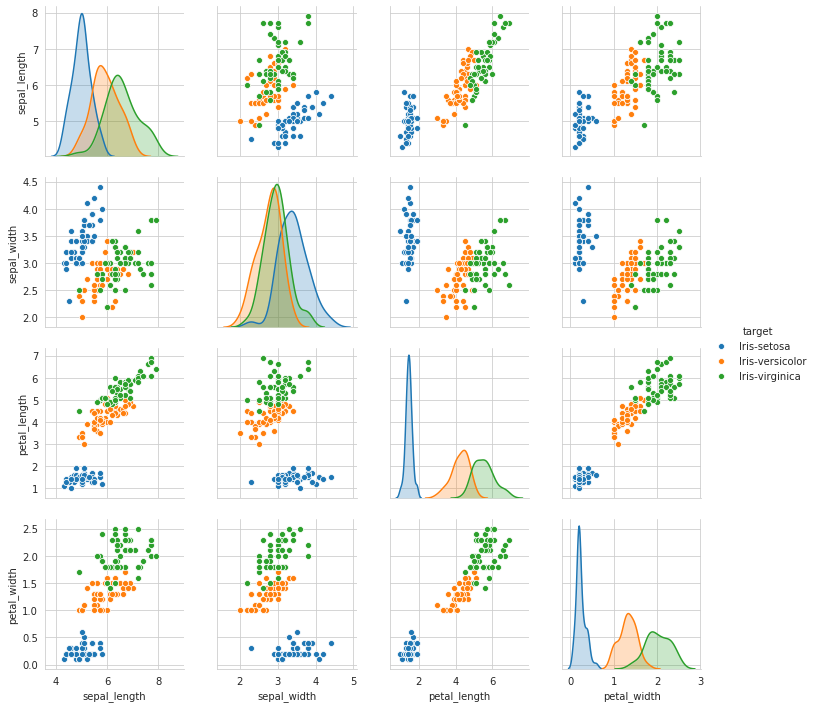

In [12]:
# Plot the data using seaborn's pairplot
sns.pairplot(data=iris_df, hue='target')

The Iris data is in a so-called 'wide' format, in which each column corresponds to a variable and each row of the DataFrame corresponds to one observation. Turn it into a 'long' format in which each row is a measurement. 

Specifically, change the data layout of the IRIS dataFrame so that it has 3 columns:
- variable (one of sepal_length, sepal_width, petal_length, petal_width)
- value
- target

If you would like to learn more, [Tidy Data](https://www.jstatsoft.org/index.php/jss/article/view/v059i10/v59i10.pdf) by [Hadley Wickham](http://hadley.nz/) provides a very nice explanation of best practices for data formating.

Hint: look at reshaping functions in http://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

In [17]:
iris_df_long = iris_df.melt(id_vars='target')
iris_df_long.head()

,target,variable,value
0,Iris-setosa,sepal_length,5.1
1,Iris-setosa,sepal_length,4.9
2,Iris-setosa,sepal_length,4.7
3,Iris-setosa,sepal_length,4.6
4,Iris-setosa,sepal_length,5.0


Now create a box-plot of values that each variable takes, split by the target species.

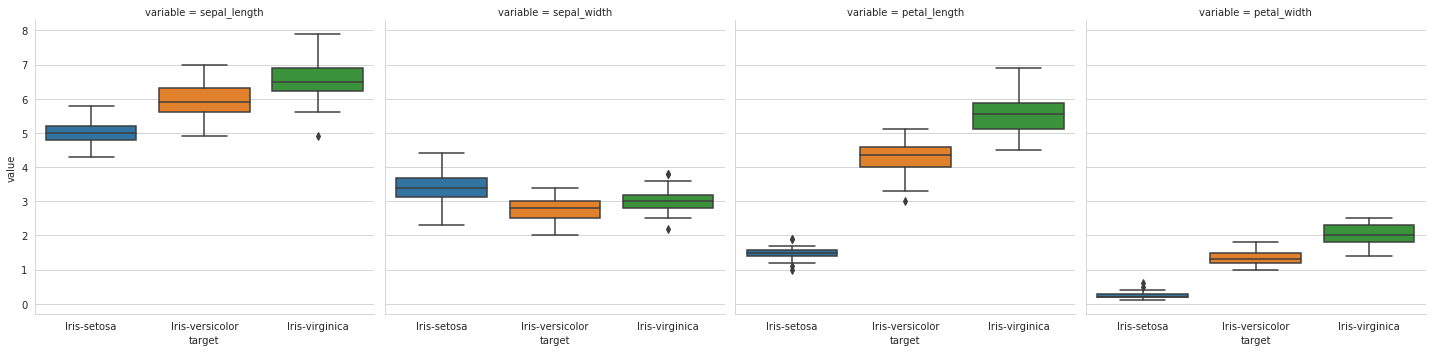

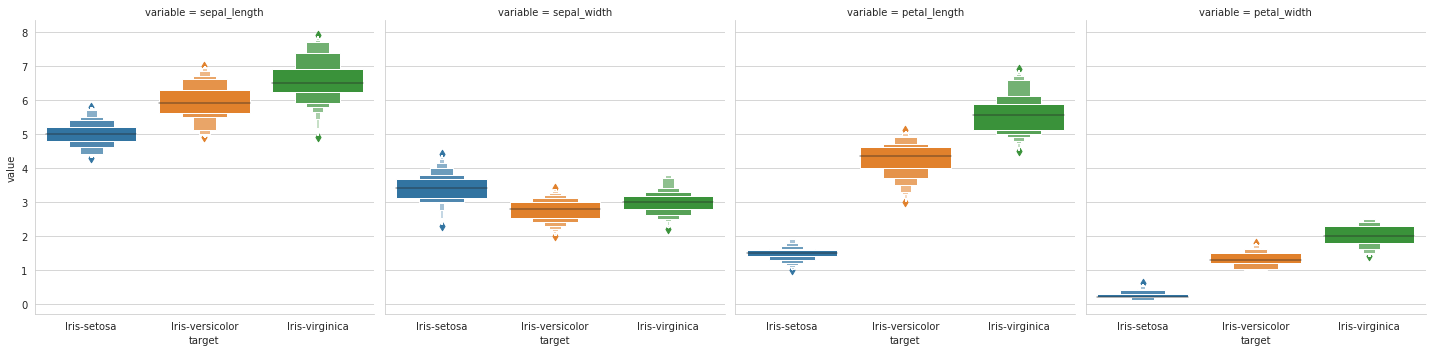

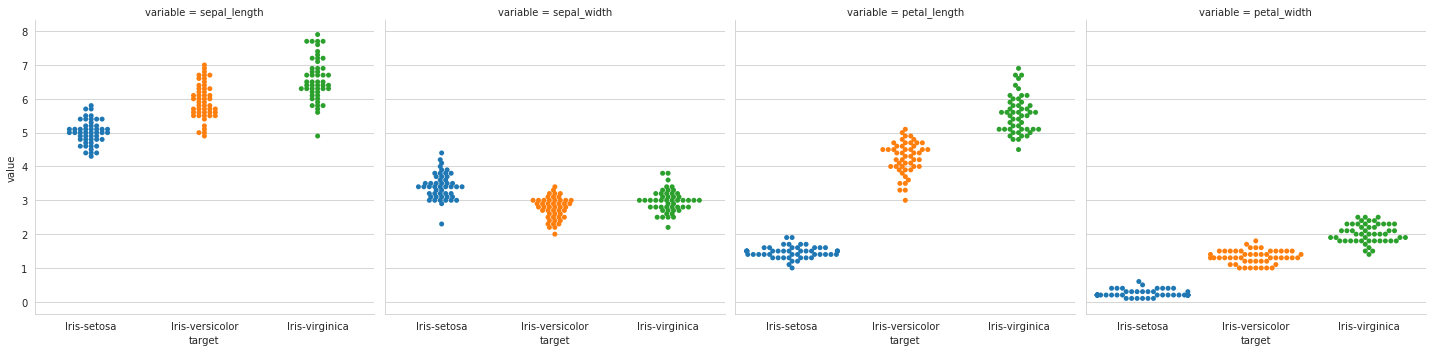

In [40]:
sns.catplot(kind='box', x='target', y='value', col='variable', data=iris_df_long)
sns.catplot(kind='boxen', x='target', y='value', col='variable', data=iris_df_long)
sns.catplot(kind='swarm', x='target', y='value', col='variable', data=iris_df_long)

### k-Nearest Neighbors

We will use the loaded Iris data describing iris flowers
and shows relations between their length and petal width for three
species (namely: setosa, versicolor, virginica).

For this exercise we will restrict our analysis to just two variables: **petal length** and **petal width**.

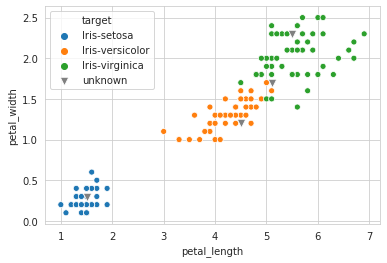

In [4]:
unknown_df = pd.DataFrame(
    [[1.5, 0.3, 'unknown'],
     [4.5, 1.2, 'unknown'],
     [5.1, 1.7, 'unknown'],
     [5.5, 2.3, 'unknown']],
     columns=['petal_length', 'petal_width', 'target'])

sns.scatterplot(x='petal_length', y='petal_width', hue='target', data=iris_df)
sns.scatterplot(x='petal_length', y='petal_width', color='gray', marker='v',
                label='unknown', s=70, data=unknown_df)

Based on these two features, it is easy to distinguish iris setosa from the two remaining species. Yet iris versicolor and virginica remain mixed together. 

Looking closely at the plot, we might estimate the species of the selected unknown irises (gray triangles). For three of them the answer seems obvious â€“ they belong in uniformly-colored areas covered by one species only. Yet unknown iris flower in (5.1, 1.7) is troublesome â€“ it lays on the boundary of versicolor and virginica clusters. We can assume, that its species is the one of the closest one to it, coming from the training set (and so having a label). 

K-Nearest Neighbors method (http://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) solves the classification problem, i.e. sets class labels (species in case of irises) of a previously unseen sample by choosing the most common class among the top k neighbors of the sample in question (for instance according to the Euclidean distance). Thus, the k-Nearest Neighbors algorithm works as follows. For each unlabeled sample x:
1. Find k nearest neighbors among the labeled samples.
2. Set the most common label among them as label of x.

#### Problem 3 [3p]

##### Implement the k-Nearest Neighbors algorithm [1p].

Take advantage of matrix calculus rather than using for loops.

**Tip:** What is computed by \begin{equation} \sqrt{(X - Y)^T (X - Y)} \end{equation} when both X and Y are vectors?

**Tip:** Try to use broadcasting (NumPy: http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html) and built-ins sort, numpy.sort, numpy.argsort (sorting), scipy.stats.mode (choosing the most common element of the set).

In [207]:
def KNN(train_X, train_Y, test_X, ks, verbose=False):
    """
    Compute predictions for various k
    Args:
        train_X: array of shape Ntrain x D
        train_Y: array of shape Ntrain
        test_X: array of shape Ntest x D
        ks: list of integers
    Returns:
        preds: dict k: predictions for k
    """
    # Cats data to float32
    train_X = train_X.astype(np.float32)
    test_X = test_X.astype(np.float32)

    # Alloc space for results
    preds = {}

    if verbose:
        print("Computing distances... ", end='')
    
    # the idea comes from squared diff formula
    dists = -2 * (test_X @ train_X.T)
    dists += np.sum(train_X ** 2, axis=1)
    # dunno why simple transposition does not work here,
    # but this effectively turns the row vector into a column one,
    # so it is of same *height* as the rest of this expression (i.e. # of test vectors)
    dists += np.sum(test_X ** 2, axis=1)[:, np.newaxis]

    if verbose:
        print("Sorting... ", end='')
    
    closest = dists.argsort()

    if verbose:
        print("Computing predictions...", end='')
    
    targets = train_Y[closest]

    for k in ks:
        predictions = [sstats.mode(targets[:, :k][idx]).mode[0] for idx in range(test_X.shape[0])]
        #predictions = predictions.ravel()
        preds[k] = predictions
    if verbose:
        print("Done")
        
    return preds

In [133]:
# Now classify the 4 unknown points
iris_x = np.array(iris_df[['petal_length', 'petal_width']])
iris_y = np.array(iris_df['target'])

unknown_x = np.array(unknown_df[['petal_length', 'petal_width']])

KNN(iris_x, iris_y, unknown_x, [1, 3, 5, 7])

{1: ['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica'],
 3: ['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica'],
 5: ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-virginica'],
 7: ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-virginica']}

##### Plot the Decision boundary [1p]


Use meshgrid to generate the points in the space spanned by data
Than map the classes to numbers 0, 1, 2 and make a contour plot with the
decision boundary

In [7]:
iris_x = np.array(iris_df[['petal_length', 'petal_width']])
iris_y = np.array(iris_df['target'])

mesh_x, mesh_y = np.meshgrid(iris_x, iris_y)
#plt.plot(mesh_x, mesh_y, marker='.', color='k')

#use np.unique with suitable options to map the class names to numbers
target_names, iris_y_ids = np.unique(iris_y, return_inverse=True)
print(target_names)
print(iris_y_ids)

mesh_data = np.hstack([mesh_x.reshape(-1, 1), mesh_y.reshape(-1, 1)])

# TODO
preds = KNN(iris_x, iris_y_ids, mesh_data, [1, 3, 5, 7])
for k, preds_k in preds.items():
    print(k)
    print(preds_k)
    plt.figure()
    plt.title(f"Decision boundary for k={k}")
    plt.contourf(...)
    plt.scatter(...)


['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


ValueError: could not convert string to float: 'Iris-setosa'

##### Estimate performance for various ks [1p]
Consider the following experiment:
1. We scramble the data and split it into two parts - training set (66.6% of all samples) and test set (33.4%).
2. Based on the training set, we use the k-NN algorithm to predict the labels on the test set.
3. We then check the number of errors and write it down.

Do this 500 times for k âˆˆ {1, 3, 5, ..., 19}. Plot a function of the average number of errors as the function of k. It should be similar to the one below.

In [213]:
def err_rates(preds, test_Y):
    ret = {}
    for k, preds_k in  preds.items():
        ret[k] = sum([
            1 if preds_k[idx] != test_Y[idx] else 0 for idx in range(len(preds_k))
        ]) / len(preds_k)
    return ret


    K  err_rate
0   1   0.04502
1   3   0.04016
2   5   0.03894
3   7   0.03750
4   9   0.03698
5  11   0.03686
6  13   0.03904
7  15   0.04206
8  17   0.04554
9  19   0.05022


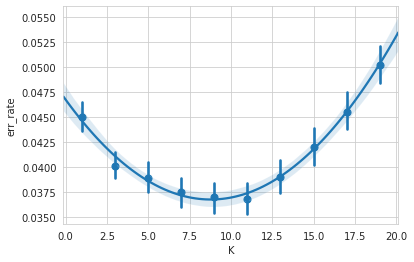

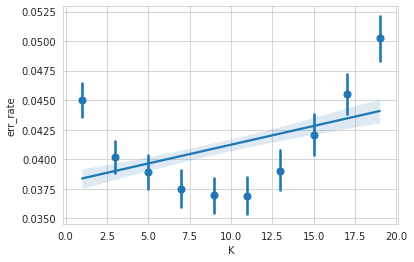

In [214]:
iris_x = np.array(iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
iris_y = np.array(iris_df['target'])

ks = range(1, 20, 2)
results = []

for _rep in tqdm_notebook(range(1000)):  # TODO 1_000
    # Use np.split and np.permutation to get training and testing indices
    how_many = iris_x.shape[0]
    train_idx, test_idx = np.split(np.random.permutation(how_many), (round(how_many * 2/3),))

    preds = KNN(iris_x[train_idx], iris_y[train_idx], iris_x[test_idx], ks)
    errs = err_rates(preds, iris_y[test_idx])
    
    for k, errs_k in errs.items():
        results.append({'K':k, 'err_rate': errs_k})

# results_df will be a data_frame in long format
results_df = pd.DataFrame(results)
averaged_results = results_df.groupby('K', as_index=False).mean()
print(averaged_results)

plt.figure()
sns.regplot(
    'K', 'err_rate', data=results_df, x_bins=10, order=2, fit_reg=True)

plt.figure()
sns.regplot(
    'K', 'err_rate', data=results_df, fit_reg=True, x_bins=10, order=1, truncate=True)


#### Problem 5 [2p + 2p bonus] 

Download a categorical dataset from UCI and try to find the most predictive variables

In [12]:
columns = [
 "target", "cap-shape", "cap-surface", "cap-color", "bruises?", "odor", 
 "gill-attachment", "gill-spacing", "gill-size", "gill-color", "stalk-shape", 
 "stalk-root", "stalk-surface-above-ring", "stalk-surface-below-ring", 
 "stalk-color-above-ring", "stalk-color-below-ring", "veil-type", "veil-color", 
 "ring-number", "ring-type", "spore-print-color", "population", "habitat", ]

# Use read_csv to load the data.
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'
mushroom_df = pd.read_csv(url, header=None, names=columns)
mushroom_df.head()

,target,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Implement the function `entropy` to compute the entropy of a columnt of the dataset.

The [entropy](https://en.wikipedia.org/wiki/Entropy_(information_theory)) of a discrete variable is defined to be:

$$H(X) = -\sum_x p_X(x) \log_2 p_X(x)$$.

A good in tutorial is given by Chris Olah: https://colah.github.io/posts/2015-09-Visual-Information/.


When $X$ is a discrete random variables, we can estimate the probabilities with counts:

$$p_X(x) = \frac{\text{number of instances where }X=x}{\text{total number of instances}}$$.


Hint: the following `pandas` functions may be useful:
- `count`
- `value_count`

Then use the datafranme's `apply` function to compute the entropy of all columns.

In [44]:
import math

def entropy(column):
    return -column.value_counts(normalize=True).map(lambda p: p*math.log2(p)).sum()

mushroom_df.apply(entropy)

target                      0.999068
cap-shape                   1.652889
cap-surface                 1.575486
cap-color                   2.510143
bruises?                    0.979327
odor                        2.319414
gill-attachment             0.173129
gill-spacing                0.637878
gill-size                   0.892256
gill-color                  3.030433
stalk-shape                 0.986927
stalk-root                  1.822922
stalk-surface-above-ring    1.221348
stalk-surface-below-ring    1.399135
stalk-color-above-ring      1.936809
stalk-color-below-ring      1.978163
veil-type                  -0.000000
veil-color                  0.196238
ring-number                 0.420680
ring-type                   1.535121
spore-print-color           2.203227
population                  2.003398
habitat                     2.274747
dtype: float64

Implement the conditional entropy computation

$$H(Y|X) = \sum_x p_X(x) H(Y|x) = \sum_x p_X(x) \sum_y p_Y(y|x) \log_2 p_Y(y|x)$$

Hint 1: the above formlua can be computed as follows:
1. split the data by the values of $X$
2. for each value $x$ that $X$ takes, compute the entropy of $Y$
3. average the entropies, weighting them by how frequent the $x$ value ocurred.

Hint 2: helpful pandas constructs are:
- `groupby` and `agg`
- you can aggregate a grouping using your own custom functions


In [174]:
def cond_entropy(df, X, Y):
    """Compute the conditional H(X|Y) in dataframe df
    Args:
        df: a dataframe
        X: the name of the conditioning columt
        Y: the name of the column whose entropy we wish to compute
    """
    occurences = df[X].value_counts(normalize=True)
    
    return df.groupby(X).agg(
        {Y: entropy}).agg(
            lambda row: row[0] * occurences.loc[row._name], axis=1).sum()

In [176]:
# Now for each column C compute the conditional entropy H(target|C)
# Knowing which variable tells us the most about the target?
for cname in mushroom_df.columns:
    print(f"{cname}: {cond_entropy(mushroom_df, cname, 'target')}")

target: 0.0
cap-shape: 0.9502711949370874
cap-surface: 0.9704776640986876
cap-color: 0.9630186138962565
bruises?: 0.8066884111112408
odor: 0.0929929194884606
gill-attachment: 0.9849028696218441
gill-spacing: 0.8981847128758901
gill-size: 0.7689135217244143
gill-color: 0.582090373456329
stalk-shape: 0.9915511243027961
stalk-root: 0.8642502592451846
stalk-surface-above-ring: 0.7143422976539759
stalk-surface-below-ring: 0.727173423479714
stalk-color-above-ring: 0.7452227234102206
stalk-color-below-ring: 0.7576523303448939
veil-type: 0.9990678968724603
veil-color: 0.9752508807515436
ring-number: 0.9606152276293699
ring-type: 0.6810463860789228
spore-print-color: 0.518362979187545
population: 0.797109877805608
habitat: 0.8422342922673683


Bonus questions:
- **[1p]** Implement computation of [Mutual Information ](https://en.wikipedia.org/wiki/Mutual_information)
- **[1p]** Add an ID column, that assigns a unique ID to each observation (row). Comompute the $H(target|ID)$ and the mutual information between target and ID. How to interpret the results? Do you think the ID is important in predicting the target? 

#### Problem 6 [2p] 

Apply the K-Nearest Neighbors (K-NN) algorithm to the MNIST dataset. 

The MNIST (http://yann.lecun.com/exdb/mnist/) dataset consists of normalized (centered and stretched) scans of hand-written digits. Specifically, each element of the dataset is a 28 Ã— 28 grayscale image, thus having 764 8-bit pixels. 

1. Display a few objects from each of the classes, paying attention to aesthetics and clarity of your presentation. **Note:** You already downloaded the dataset in "Setup" section. Please use the code below to get started.

2. **[2p]** Apply a k-NN classifier to the MNIST dataset. First, divide the training set into two parts, which we will call training and validation. On MNIST use the first 50000 samples for training and the last 10000 for validation. Then find the optimal number of neighbors by assessing the accuracy on the validation set. You do not need to repeat this experiment multiple times. Finally, compute the accuracy on the test set obtained with the best previously chosen number of neighbors. On MNIST you should get about 3% errors. Pick a few mislabeled samples from the test dataset and plot them along with the correct ones. **Note:**
  * MNIST is much larger than the Iris dataset. A good implementation may need a few minutes depending on your runtime type. Please optimize your algorithm:
  * Compute the distances only once, then test for different values of k.
  * Use vectorized expressions to compute the distance. It is possible to compute all distances between the training and testing points in one expression. Hint: think about the vectorized expression \begin{equation}(X - Y)^T (X - Y)\end{equation}
  * You can use single precision numbers in computation.
  * If your code is taking a long time to execute, please save its results before the lab session.

**Note:** in NumPy, matrices have its own data type (dtype), which is retained during
calculations. Please pay attention to it. I particular, do not subtract values of data types not
having the sign bit, do not divide integers, etc. Results of such operations will not be
automatically casted to types having the required precision.

In [178]:
with np.load('mnist.npz') as data:
    mnist_full_train_data_uint8 = data['train_data']
    mnist_full_train_labels_int64 = data['train_labels']
    mnist_test_data_uint8 = data['test_data']
    mnist_test_labels_int64 = data['test_labels']
        
# Split train data into train and validation sets
mnist_train_data_uint8 = mnist_full_train_data_uint8[:50000]
mnist_train_labels_int64 = mnist_full_train_labels_int64[:50000]
mnist_valid_data_uint8 = mnist_full_train_data_uint8[50000:]
mnist_valid_labels_int64 = mnist_full_train_labels_int64[50000:]

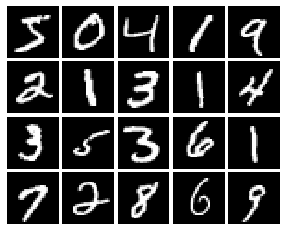

In [179]:
plot_mat(mnist_train_data_uint8[:20, None], cmap='gray')

In [217]:
# MNIST is large.
# Implement a batched KNN classifier, which processes the test data in small batches
# and returns the error rates

# The code should not run for more than a couple of minutes on the Colab runtime, 
# If it is slower, optimize the distance computation in KNN

def batched_KNN(train_X, train_Y, test_X, ks, verbose=False, batch_size=200):
    all_preds = {k: [] for k in ks}
    for i in range(0, test_X.shape[0], batch_size):
        batch_X = test_X[i:i + batch_size]
        if verbose:
            print(f"Processing batch {i}:{i + batch_X.shape[0]}... ", end='')
        current_preds = KNN(train_X, train_Y, batch_X, ks, verbose=verbose)
        for k in all_preds.keys():
            all_preds[k].extend(current_preds[k])
    return all_preds

Processing batch 0:200... Computing distances... Sorting... Computing predictions...Done
Processing batch 200:400... Computing distances... Sorting... Computing predictions...Done
Processing batch 400:600... Computing distances... Sorting... Computing predictions...Done
Processing batch 600:800... Computing distances... Sorting... Computing predictions...Done
Processing batch 800:1000... Computing distances... Sorting... Computing predictions...Done
Processing batch 1000:1200... Computing distances... Sorting... Computing predictions...Done
Processing batch 1200:1400... Computing distances... Sorting... Computing predictions...Done
Processing batch 1400:1600... Computing distances... Sorting... Computing predictions...Done
Processing batch 1600:1800... Computing distances... Sorting... Computing predictions...Done
Processing batch 1800:2000... Computing distances... Sorting... Computing predictions...Done
Processing batch 2000:2200... Computing distances... Sorting... Computing predict

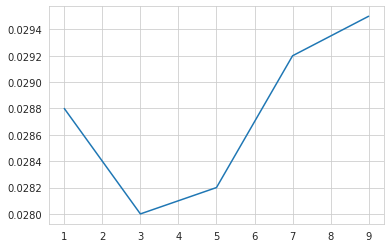

In [218]:
# Now find the best k on the validation set
ks = [1, 3, 5, 7, 9]
mnist_validation_preds = batched_KNN(
    mnist_train_data_uint8.astype('float32').reshape(-1, 28*28), mnist_train_labels_int64,
    mnist_valid_data_uint8.astype('float32').reshape(-1, 28*28),
    ks, verbose=True)

mnist_validation_errs = err_rates(mnist_validation_preds, mnist_valid_labels_int64)
plt.plot(ks, [mnist_validation_errs[k] for k in ks])

In [219]:
# Now use the best k to compute the test error

best_K = 3

mnist_test_preds = batched_KNN(
    mnist_full_train_data_uint8.astype('float32').reshape(-1, 28*28), 
    mnist_full_train_labels_int64,
    mnist_test_data_uint8.astype('float32').reshape(-1, 28*28), 
    [best_K], verbose=True)

mnist_test_errs = err_rates(mnist_test_preds, mnist_test_labels_int64)
print(f"\n\nWhen k={best_K} the test error rate is {mnist_test_errs[best_K] * 100.0:.1f}%%")

Processing batch 0:200... Computing distances... Sorting... Computing predictions...Done
Processing batch 200:400... Computing distances... Sorting... Computing predictions...Done
Processing batch 400:600... Computing distances... Sorting... Computing predictions...Done
Processing batch 600:800... Computing distances... Sorting... Computing predictions...Done
Processing batch 800:1000... Computing distances... Sorting... Computing predictions...Done
Processing batch 1000:1200... Computing distances... Sorting... Computing predictions...Done
Processing batch 1200:1400... Computing distances... Sorting... Computing predictions...Done
Processing batch 1400:1600... Computing distances... Sorting... Computing predictions...Done
Processing batch 1600:1800... Computing distances... Sorting... Computing predictions...Done
Processing batch 1800:2000... Computing distances... Sorting... Computing predictions...Done
Processing batch 2000:2200... Computing distances... Sorting... Computing predict

### Locality sensitive hashing

Problem 5 was about speeding up the inference using loops implicitly present in matrix multiplication instead of explicit loops in Python. In this problem, we will explore a strategy to truly reduce the total number of computations required to find nearest neighbors without sacrificing too much accuracy.

To speed up nearest neighbor search we will employ *Locality Sensitive Hashing (LSH)* functions. For a given distance metric, the locality sensitive hash should put items that are similar into the same bucket. Notice that this is essentially a design choice opposite to traditional cryptographic hash functions that should amplify the difference of similar inputs (typically we want that small perturbations of data result in large changes to the hash value).

One of the simplest implementations of LSH approximates the cosine distance. Let $x\in \mathbb{R}^N$ and $y\in \mathbb{R}^N$ be two vectors. Their cosine distance is defined as:

\begin{equation}
    d_\text{cos}(x,y) = \frac{x \cdot y}{\|x\| \|y\|} = \cos\left(\theta(x,y)\right),
\end{equation}
where $\theta(x,y)$ is the unsigned angle between $x$ and $y$.

We will construct a family $H$ of hash functions that are an LSH for angle distances (an approximation to cosine distance). Assume $p\in \mathbb{R}^N$ is a random vector (components are sampled from the normal distribution) of length 1. Then define the hash function $h(x) = \text{sgn}(x\cdot p)$, where $\text{sgn()}$ is the sign function. It can be proven that:

\begin{equation}
    p_{h\in H}[h(x)=h(y)] = 1 - \frac{\theta(x,y)}{\pi}.
\end{equation}

The equation means that the probability of a hash collision grows as the the angle between two vectors gets smaller. Therefore, vectors that are close according to the cosine distance will be put with high probability into the same bin (we use the fact that for small $\theta$ we can approximate $\cos(\theta) = 1 - \theta/\pi$.

We will say that a family of randomly chosen hash functions $H$ is $(d_1, d_2, p_1, p_2)$-sensitive with respect to a distance metric $d$ if for any $x$ and $y$:
1. If $d(x,y) \leq d_1$ then $p_{h\in H}[h(x)=h(y)] \geq p_1$.
2. If $d(x,y) \geq d_2$ then $p_{h\in H}[h(x)=h(y)] \leq p_2$.

For example, our family of randomly chosen hyperplanes is $(d_1, d_2, (1-d_1)/\pi, (1-d_2)/\pi)$-sensitive.

Ideally, vectors should be placed into the same bin with a high probability if their distance is smaller than a threshold, and with a low probability if their distance is larger that the threshold. By combining hashing functions we can get closer to this ideal sensitivity.

Given a family of hash functions $H$ with sensitivity $(d_1, d_2, p_1, p_2)$ we can construct a new family $H'$ by combining $r$ functions from $H$:
1. AND: let $h=[h_1, h_2, \ldots, h_r] \in H'$ and $h(x)=h(y)$ if and only if $\forall_i h_i(x)=h_i(y)$. Then $H'$ is $(d_1, d_2, (p_1)^r, (p_2)^r)$-sensitive.
2. OR: let $h=[h_1, h_2, \ldots, h_r] \in H'$ and $h(x)=h(y)$ if and only if $\exists_i h_i(x)=h_i(y)$. Then $H'$ is $(d_1, d_2, 1-(1-p_1)^r, 1-(1-p_2)^r)$-sensitive.

AND makes all probabilities shrink, but properly choosing $r$ we can make the lower probability approach 0 while the higher does not. Conversely, OR makes all probabilities grow, we can make the upper probability approach 1 while the lower does not.

#### Problem 7 [1-3p bonus] 

1. **[1bp for exercises list]** **Note:** you can show sketches of proofs for this assignment.
    1. Show that angle between vectors is a metric (https://en.wikipedia.org/wiki/Metric_(mathematics)).
    
    2. Show that $p_{h\in H}[h(x)=h(y)] = 1 - \frac{\theta(x,y)}{\pi}$ for $h$ computed using a randomly chosen hyperplane.

    3. Show the properties of either AND or OR boosting of LSH.

  Please show the solution to this problem dirung the Session for Homework 1, the bonus point will also be added to the points from Homework 1.

3. **[1-3bp]** Reimplement k-Nearest Neighbors for MNIST classification using the cosine distance instead of the Euclidean distance. Choose a sensible value of $k$. Use Locality Sensitive Hashing to achieve an error rate no greater than $150\%$ of the original error rate with at least a $90\%$ speedup (i.e., by considering on average at most 5000 training samples per query image). For a few settings plot the speedup-vs-accuracy relation.

  **Note:** points will be awarded based on ingenuity of your solution. Feel free to explore your own ideas!
